In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split , KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import clone
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, KFold
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, KFold
import numpy as np


In [36]:
df=pd.read_csv('Train_Data.csv')

In [37]:
print(df.columns)


Index(['pc', 'ld', 'm0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'm14', 'ma', 'pred'],
      dtype='object')


In [38]:
print(df.isnull().sum())
df.describe()

pc         0
ld       222
m0         0
m1         0
m2         0
m3       314
m4       467
m5       576
m6       675
m7       788
m8       900
m9      1047
m10     1100
m11     1227
m12     1381
m13     1499
m14     1589
ma         0
pred       0
dtype: int64


,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,pred
count,22362.000000,22584.000000,22584.000000,22584.000000,22270.000000,22117.000000,22008.000000,21909.000000,21796.000000,21684.000000,21537.000000,21484.000000,21357.000000,21203.000000,21085.000000,20995.000000,22584.000000
mean,127.893905,78.002391,6.589621,65.664054,14.241585,123.207337,13.697683,183.894313,9.380175,199.786867,9.143454,169.239563,15.334764,122.868388,12.521853,168.530817,0.215772
std,39.078070,43.156539,3.360565,34.690224,0.801207,10.481427,0.798463,10.478648,0.800904,10.578785,0.799078,14.754047,1.214489,15.669803,0.923849,15.643776,0.411366
min,33.160000,0.000000,0.000000,0.000000,11.174400,84.084000,10.250400,133.507500,6.374400,159.778500,6.029600,100.170000,10.096000,54.253500,8.712000,95.970000,0.000000
25%,100.090000,42.000000,4.000000,42.000000,13.703200,116.067000,13.147200,176.809500,8.842200,192.651375,8.604000,159.715500,14.529600,112.365750,11.912000,158.109000,0.000000
50%,122.355000,73.500000,6.400000,63.000000,14.239200,123.207000,13.702400,183.949500,9.378800,199.741500,9.143200,169.359750,15.364000,123.007500,12.504000,168.441000,0.000000
75%,149.247500,105.000000,8.800000,84.000000,14.786400,130.357500,14.239200,190.932000,9.916000,206.944500,9.679200,178.741500,16.161600,133.465500,13.098400,179.361000,0.000000
max,385.860000,283.500000,23.200000,252.000000,17.199200,173.082000,17.140000,226.201500,12.335200,249.973500,12.329600,236.029500,20.512000,185.461500,18.170400,234.181500,1.000000


In [39]:
print(df['pc'].unique())
print(df['ma'].unique())



['y' 'E' 'x' 'w' 'z']
['m78' 'm76' 'm55' 'm75']


In [40]:
# Encode categorical variable using one-hot encoding
onehot_encoded = pd.get_dummies(df['pc'], prefix='pc')
# Concatenate the original DataFrame with the encoded columns
df = pd.concat([df, onehot_encoded], axis=1)
# Remove the original categorical column
df.drop('pc', axis=1, inplace=True)
df.drop('ma', axis=1, inplace=True)

target_col = df.pop('pred')
df['pred'] = target_col  # Add the target column at the last position



<ipython-input-41-1277e45e3a9d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, ax=axes[i])
<ipython-input-41-1277e45e3a9d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, ax=axes[i])
<ipython-input-41-1277e45e3a9d>:7: UserWarning: 

`distplot` is a deprecated function and will be 

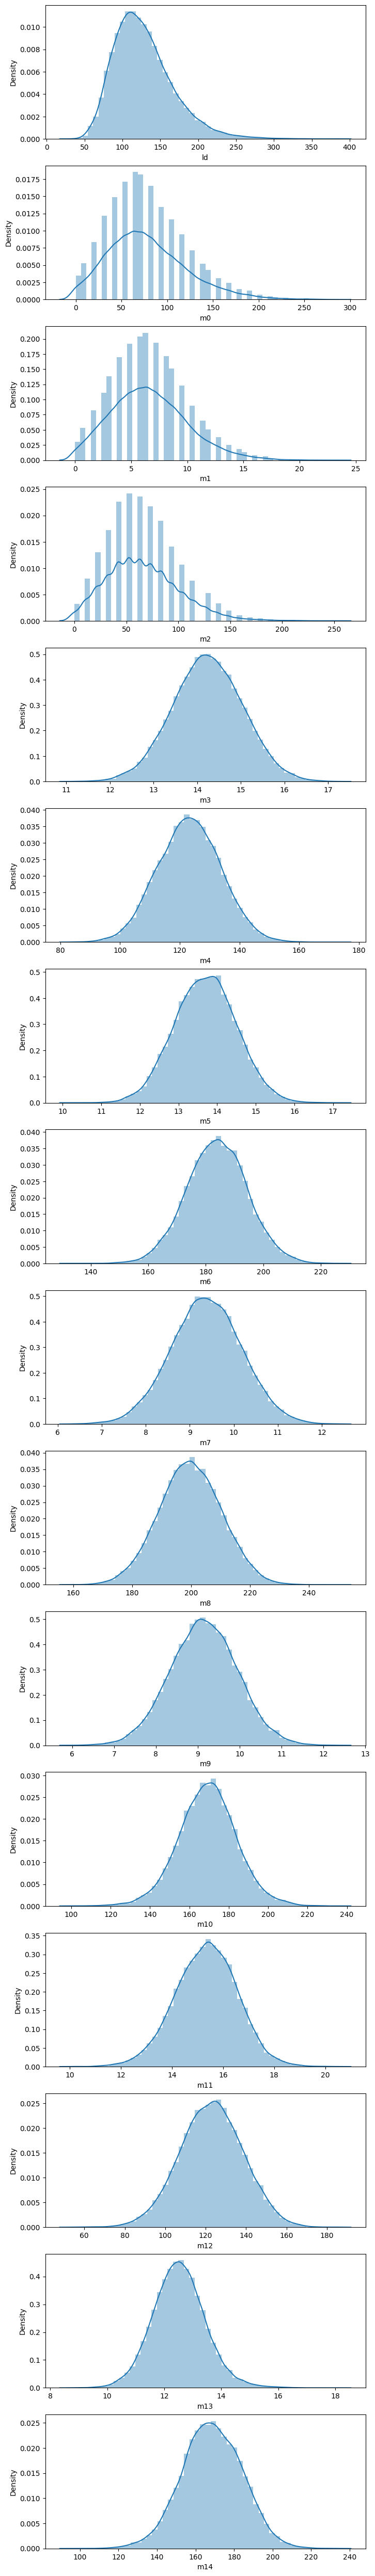

In [41]:
l1= [df['ld'], df['m0'], df['m1'], df['m2'],df['m3'], df['m4'], df['m5'],df['m6'], df['m7'], df['m8'],df['m9'], df['m10'], df['m11'],df['m12'], df['m13'], df['m14']]
l2=['ld', 'm0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11','m12','m13','m14']


fig, axes = plt.subplots(len(l1), 1, figsize=(8, len(l1)*4))
for i, data in enumerate(l1):
    sns.distplot(data, ax=axes[i])
plt.show()


In [42]:
df['ld']= df['ld'].fillna(df['ld'].median())
for i in df.iloc[:,4:]:
    df[i]= df[i].fillna(df[i].mean())
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [43]:
df_test=pd.read_csv('Test_Data.csv')
df_test.drop('index', axis=1, inplace=True)
# Encode categorical variable using one-hot encoding
onehot_encoded = pd.get_dummies(df_test['pc'], prefix='pc')
df_test = pd.concat([df_test, onehot_encoded], axis=1)
df_test.drop('pc', axis=1, inplace=True)
df_test.drop('ma', axis=1, inplace=True)


<ipython-input-44-5ba4ea030c60>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, ax=axes[i])
<ipython-input-44-5ba4ea030c60>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, ax=axes[i])
<ipython-input-44-5ba4ea030c60>:4: UserWarning: 

`distplot` is a deprecated function and will be 

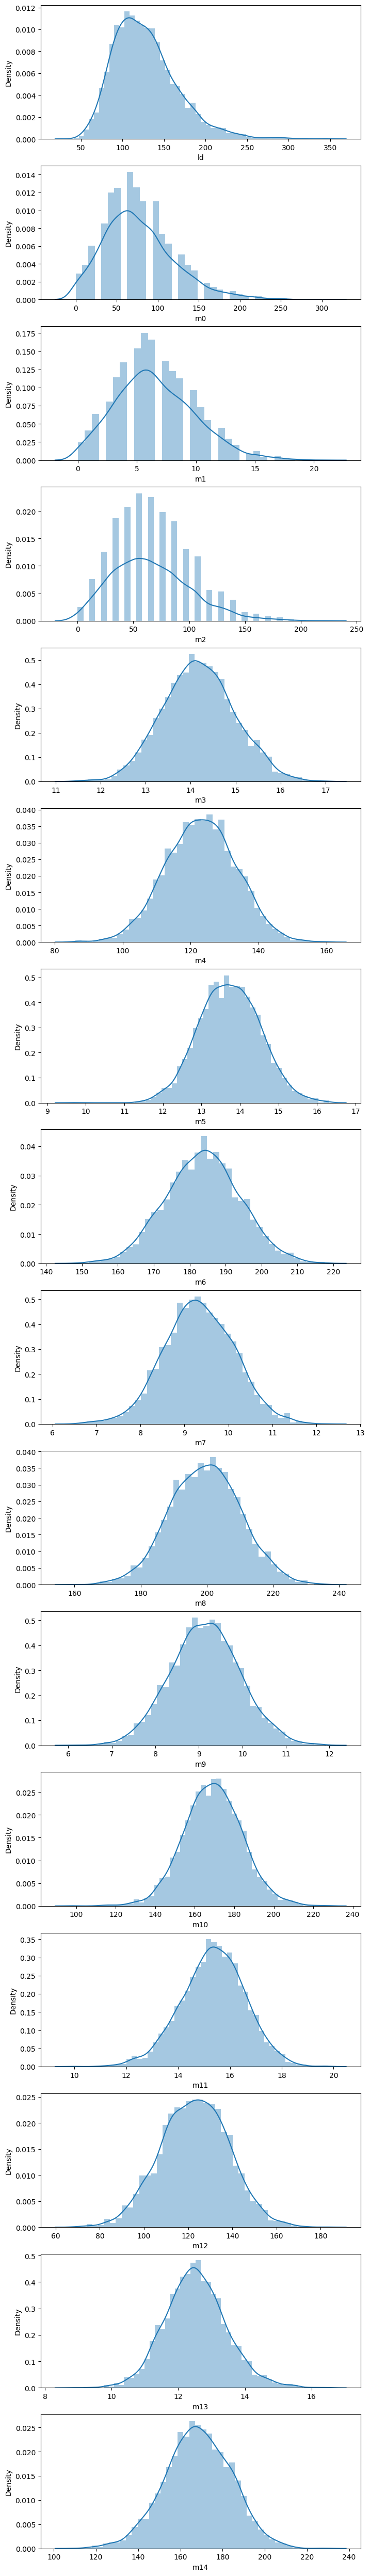

In [44]:
list3=[df_test['ld'], df_test['m0'], df_test['m1'], df_test['m2'],df_test['m3'], df_test['m4'], df_test['m5'],df_test['m6'], df_test['m7'], df_test['m8'],df_test['m9'], df_test['m10'], df_test['m11'],df_test['m12'], df_test['m13'], df_test['m14']]
fig, axes = plt.subplots(len(list3), 1, figsize=(8, len(list3)*4))
for i, data in enumerate(list3):
    sns.distplot(data, ax=axes[i])
plt.show()

# filling values
df_test['ld']= df_test['ld'].fillna(df_test['ld'].median())
df_test['m5']= df_test['m5'].fillna(df_test['m5'].median())
df_test['m3']= df_test['m3'].fillna(df_test['m3'].mean())
df_test['m4']= df_test['m4'].fillna(df_test['m4'].mean())
for i in df_test.iloc[:,7:]:
    df_test[i]= df_test[i].fillna(df[i].mean())

In [46]:


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
k = 10 # Number of folds for cross-validation
kt = KFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []
f1_scores = []

for train_index, val_index in kt.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    nb = GaussianNB()
    nb.fit(X_train_fold, y_train_fold)
    y_pred = nb.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracies.append(accuracy)
    f1 = f1_score(y_val_fold, y_pred)
    f1_scores.append(f1)


avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)
nb.fit(X_train, y_train)
y_pred_val = nb.predict(X_val)

accuracy_val = accuracy_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
print("avg F1 Score:", avg_f1)
print("F1 Score on Validation Set:", f1_val)


avg F1 Score: 0.06376179421782423
F1 Score on Validation Set: 0.06349206349206349


In [48]:


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
k = 10  # Number of folds for cross-validation
max_depth = 50  # Maximum depth of the decision tree
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []
f1_scores = []

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Initialize and train the Decision Tree classifier with limited depth
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred = dt.predict(X_val_fold)

    # Calculate accuracy
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracies.append(accuracy)


    f1 = f1_score(y_val_fold, y_pred)
    f1_scores.append(f1)

avg_accuracy = np.mean(accuracies)
avg_f1 = np.mean(f1_scores)


dt.fit(X_train, y_train)


y_pred_val = dt.predict(X_val)


accuracy_val = accuracy_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)


print("Avg F1 Score (Cross-Validation):", avg_f1)
print("F1 Score on Validation Set:", f1_val)



Avg F1 Score (Cross-Validation): 0.23822878308268597
F1 Score on Validation Set: 0.2312925170068027


In [49]:
ensemble = [clone(nb), clone(dt)]


for model in ensemble:
    model.fit(X_train, y_train)

ensemble_pred = [model.predict(X_val) for model in ensemble]
ensemble_pred_avg = np.mean(ensemble_pred, axis=0)
ensemble_pred_labels = np.where(ensemble_pred_avg >= 0.5, 1, 0)
f1 = f1_score(y_val, ensemble_pred_labels)
print("F1 Score:", f1)

F1 Score: 0.2298634008478568


In [50]:
x_test=df_test.values


y1 = [model.predict(x_test) for model in ensemble]
y2 = np.mean(y1, axis=0)
prediction = np.where(y2 >= 0.5, 1, 0)


submission = pd.DataFrame({'pred': prediction})

submission.to_csv('Submission.csv', index=False)

